In [1]:
using Legendre, GLMakie
using GeometryBasics, LinearAlgebra, StatsBase
using AbstractPlotting: get_dim, surface_normals

https://en.wikipedia.org/wiki/Spherical_harmonics

In [2]:
function getMesh(x,y,z)
    positions = vec(map(CartesianIndices(z)) do i
    GeometryBasics.Point{3, Float32}(
        get_dim(x, i, 1, size(z)),
        get_dim(y, i, 2, size(z)),
        z[i])
    end)
    faces = decompose(GLTriangleFace, Rect2D(0f0, 0f0, 1f0, 1f0), size(z))
    normals = surface_normals(x, y, z)
    vertices = GeometryBasics.meta(positions; normals=normals) 
    meshObj = GeometryBasics.Mesh(vertices, faces)
    meshObj 
end

getMesh (generic function with 1 method)

In [3]:
function Y(θ, ϕ, l, m)
    if m < 0 
        return (-1)^m * √2 * Nlm(l, abs(m)) * Plm(l, abs(m), cos(θ)) * sin(abs(m)*ϕ)
    elseif m == 0
        return sqrt((2*l+1)/4π)*Plm(l, m, cos(θ))
    else
        return (-1)^m * √2 * Nlm(l, m) * Plm(l, m, cos(θ)) * cos(m*ϕ)
    end
end

Y (generic function with 1 method)

In [4]:
# Grids of polar and azimuthal angles
θ = LinRange(0, π, 200)
ϕ = LinRange(0, 2π, 200);

In [5]:
x = [sin(θ)*sin(ϕ) for θ in θ, ϕ in ϕ]
y = [sin(θ)*cos(ϕ) for θ in θ, ϕ in ϕ]
z = [cos(θ)        for θ in θ, ϕ in ϕ];

In [6]:
Ygrid = [Y(θ, ϕ, 1, 0) for θ in θ, ϕ in ϕ]
Ylm = abs.(Ygrid)
Ygrid2 = vec(Ygrid);

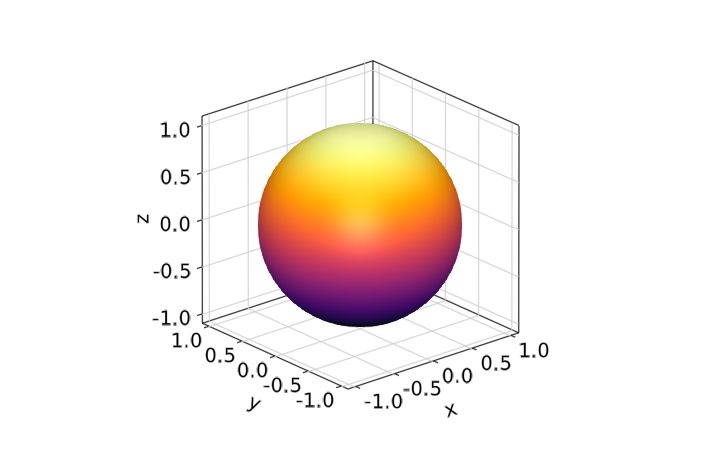

In [7]:
mesh(getMesh(x,y,z), color = Ygrid2, colormap = :inferno, shading = true, 
    ambient = Vec3f0(0.75, 0.75, 0.75), axis = (
        type = Axis3,
        aspect = :data,
    ))

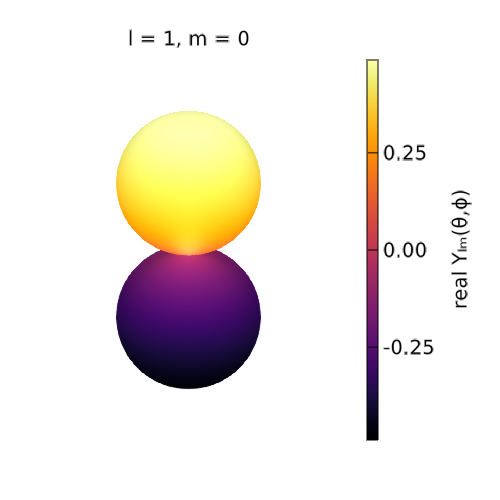

In [10]:
fig, ax, pltobj = mesh(getMesh(Ylm .* x, Ylm .* y, Ylm .* z), color = Ygrid2, 
    colormap = :inferno, shading = true, ambient = Vec3f0(0.85, 0.85, 0.85),
    figure = (resolution = (500, 500), fontsize = 20, backgroundcolor = :white),
    axis = (title = "l = 1, m = 0",
        type = Axis3,
        aspect = :data,
    )
    )
cbar = Colorbar(fig, pltobj, label = "real Yₗₘ(θ,ϕ)", width = 11, tickalign = 1, tickwidth = 1)

hidespines!(ax)
hidedecorations!(ax)
fig[1,2] = cbar
fig
#save("Y10.png", fig, px_per_unit = 2)

In [14]:
l = 1
m = 0
Ygrid = [Y(θ, ϕ, l, m) for θ in θ, ϕ in ϕ]
Ylm = abs.(Ygrid)
Ygrid2 = vec(Ygrid)
ambient =  Vec3f0(0.85, 0.85, 0.85)
cmap = :inferno
fig = Figure(resolution = (900, 500))
ax1 = Axis3(fig, aspect = :data)
ax2 = Axis3(fig, aspect = :data)
pltobj = mesh!(ax1, getMesh(x, y, z), color = Ygrid2, colormap = cmap, ambient = ambient)
mesh!(ax2, getMesh(Ylm .* x, Ylm .* y, Ylm .* z), color = Ygrid2, colormap = cmap,  ambient = ambient)
hidespines!(ax1)
hidedecorations!(ax1)
hidespines!(ax2)
hidedecorations!(ax2)
cbar = Colorbar(fig, pltobj, label = "Yₗₘ(θ,ϕ)", width = 11, tickalign = 1, tickwidth = 1)
fig[1,1] = ax1
fig[1,2] = ax2
fig[1,3] = cbar
fig[0,:] = Label(fig, "Tesseral Spherical Harmonics l = $(l), m = $(m)", textsize = 20, color = (:black, 0.85))
#GLMakie.trim!(fig.layout)
fig 
save("sY10.png", fig, px_per_unit = 2)

GLMakie.Screen(...)

In [16]:
cmap = :inferno
for l in 1:6
    for m in -l:l 
        Ygrid = [Y(θ, ϕ, l, m) for θ in θ, ϕ in ϕ]
        Ylm = abs.(Ygrid)
        Ygrid2 = vec(Ygrid)
        ambient =  Vec3f0(0.85, 0.85, 0.85)
        cmap = :inferno
        
        fig = Figure(resolution = (900, 600))
        ax1 = Axis3(fig, aspect = :data)
        ax2 = Axis3(fig, aspect = :data)
        pltobj = mesh!(ax1, getMesh(x, y, z), color = Ygrid2, colormap = cmap, ambient = ambient)
        mesh!(ax2, getMesh(Ylm .* x, Ylm .* y, Ylm .* z), color = Ygrid2, colormap = cmap,  ambient = ambient)
        hidespines!(ax1)
        hidedecorations!(ax1)
        hidespines!(ax2)
        hidedecorations!(ax2)
        cbar = Colorbar(fig, pltobj, label = "Yₗₘ(θ,ϕ)", width = 11, tickalign = 1, tickwidth = 1)
        fig[1,1] = ax1
        fig[1,2] = ax2
        fig[1,3] = cbar
        fig[0,:] = Label(fig, "Tesseral Spherical Harmonics l = $(l), m = $(m)", textsize = 20, 
            color = (:black, 0.85))
        #GLMakie.trim!(fig.layout)
        save("sY_$(l)_$(m).png", fig, px_per_unit = 2)
    end
end

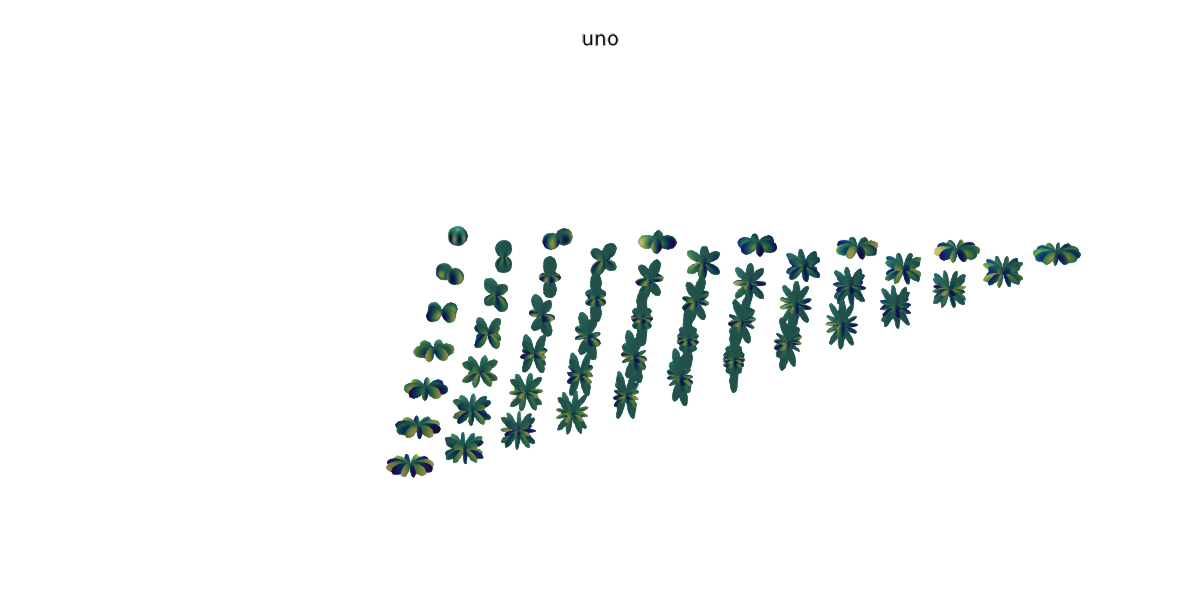

In [17]:
fig = Figure(resolution = (1200, 600))
#ax = LScene(fig, scenekw = (camera = cam3d!, show_axis =false) )
ax = Axis3(fig, aspect = :data, title = "uno")
for l in 0:6
    for m in -l:l
        Ygrid = [Y(θ, ϕ, l, m) for θ in θ, ϕ in ϕ]
        Ylm = abs.(Ygrid)
        mesh!(ax, getMesh(Ylm .* x .- 2m, Ylm .* y .-2l, Ylm .* z), color = Ygrid2, 
            colormap = :haline, 
            lightposition = Vec3f0(- 2m, -2l, maximum(Ylm .* z) + 0.5))
    end
end
hidespines!(ax)
hidedecorations!(ax)
fig[1,1] = ax
fig     